# Actividad 5


El diagrama de Moody se genera encontrando fa partir de la ecuación de Colebrook-White: 
para distintos valores de la rugosidad relativa /D y el número de Reynolds Re.

Escriba un programa en Octave que genere ese diagrama en la zona turbulenta, para valores de la rugosidad relativa /D (0,0001; 0,0002; 0,0004; 0,0006; 0,0008; 0,001; 0,002; 0,004; 0,006; 0,008; 0,01; 0,02; 0,04; 0,06; 0,08) y del número de Reynolds Re entre (103 y 108). Utilice el método de Newton-Raphson realizando 10 iteraciones para la búsqueda de cada solución en la ecuación de Coolebrok-White.

In [1]:
# Librerias
import numpy as np
import matplotlib.pyplot as mp

In [2]:
# Inputs
r = [0.0001, 0.0002, 0.0004, 0.0006, 0.0008, 0.001, 0.002, 0.004, 0.006, 0.008, 0.01, 0.02, 0.04, 0.06, 0.08]
Re = [4*10**3,10**4,10**5,10**6,10**7,10**8]
tol = 5e-10
fx = lambda x,r,Re: 1/np.sqrt(x) + (2*np.log10((2.51/(Re*np.sqrt(x)))+(r/3.71)))
dfx = lambda x,r,Re: (-0.5 / (x*np.sqrt(x))) - ((2/np.log(10)) * ((2.51/(Re*np.sqrt(x))) / ((2.51/(Re*np.sqrt(x))) + (r/3.71))))
mI = 20
print (r)
print (Re)

[0.0001, 0.0002, 0.0004, 0.0006, 0.0008, 0.001, 0.002, 0.004, 0.006, 0.008, 0.01, 0.02, 0.04, 0.06, 0.08]
[4000, 10000, 100000, 1000000, 10000000, 100000000]


In [3]:
# Procedimiento
    #Parte no Lineal
tabla = []
h=0
p=0
ñ=0
A=np.zeros((15,6))
for q in r:
    for m in Re:          
        x0 = 64/m
        xi = x0
        tramo = abs(2*tol)
        while (tramo >= tol) and (ñ<mI):
            ñ+=1
            g = fx(xi,q,m)
            k = dfx(xi,q,m)
            n = g/k
            xn = xi - n
            tramo = abs(n)
            xi = xn
            #print('xi es:',xi,'fx/dfx es:', n,'fx es:', g,'dfx es:', k,'el error es:', tramo,'h es:',h,'k es:',p)
        w = int(p)
        v = int(h)
        A[w][v] = xi
        #print('Re es: ',m,', r es: ',q,'x es: ', xi, 'iteraciones: ', ñ)
        h+=1
        ñ=0
    p+=1
    h=0

#Parte Lineal
f=[64/(0.75*10**3),64/(4*10**3)]
R=[0.75*10**3,4*10**3]

C:\Users\nekko\AppData\Local\Temp/ipykernel_2536/1163296800.py:18: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  mp.xscale("log",basex=10)


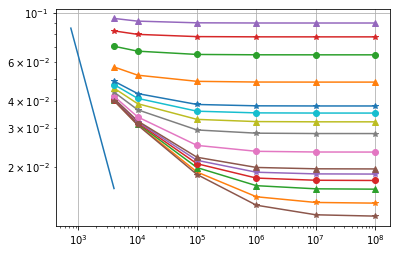

In [6]:
#Outputs
mp.plot(R,f)
mp.plot(Re,A[1][:],'*-')
mp.plot(Re,A[2][:],'^-')
mp.plot(Re,A[3][:],'o-')
mp.plot(Re,A[4][:],'*-')
mp.plot(Re,A[5][:],'^-')
mp.plot(Re,A[6][:],'o-')
mp.plot(Re,A[7][:],'*-')
mp.plot(Re,A[8][:],'^-')
mp.plot(Re,A[9][:],'o-')
mp.plot(Re,A[10][:],'*-')
mp.plot(Re,A[11][:],'^-')
mp.plot(Re,A[12][:],'o-')
mp.plot(Re,A[13][:],'*-')
mp.plot(Re,A[14][:],'^-')
mp.plot(Re,A[0][:],'*-')
mp.xscale("log",basex=10)
mp.yscale("log")
mp.grid()
#rx=mp.gca()
#rx.set_facecolor('m')